# This notebook explores results from the 2018 road cycling season

Data<sup>1</sup> include categorized races performed by all riders in World Tour teams<sup>2</sup>. This include 18 teams with a total of 522 riders.
#### The goal is to find features that can predict the general ciassification winner (maybe top 10 is better) of Tour de France (TdF).  
<sup>1</sup>data is scraped from CQranking  
<sup>2</sup>Pro Continental teams are excluded for now

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('max_colwidth', 500)
pd.set_option('display.width', 100)
pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.max_rows", 100)

In [54]:
df_riders = pd.read_csv(r'E:\cycling\cycling\data\riders_2018.csv',encoding='iso-8859-1')
df_rider_results = pd.read_csv(r'E:\cycling\cycling\data\rider_results_2018.csv',encoding='iso-8859-1')

In [55]:
df_riders.head(20)

,team,Rider,Date of birth,rank_start,point_start,rank_end,point_end,Comments,Country
0,ALM,BAGDONAS Gediminas,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
1,ALM,BAKELANTS Jan,14/02/1986,117.0,472.0,565.0,120.0,NaN,BEL
2,ALM,BARBIER Rudy,18/12/1992,104.0,506.0,717.0,90.0,NaN,FRA
3,ALM,BARDET Romain,09/11/1990,30.0,1162.0,14.0,1492.0,NaN,FRA
4,ALM,BIDARD François,19/03/1992,781.0,80.0,523.0,137.0,NaN,FRA
5,ALM,BOUCHARD Geoffrey,01/04/1992,NaN,NaN,1140.0,42.0,Trainee as from 31/07,FRA
6,ALM,CHAMPOUSSIN Clément,29/05/1998,2949.0,2.0,978.0,55.0,Trainee as from 31/07,FRA
7,ALM,CHEREL Mikael,17/03/1986,552.0,127.0,492.0,147.0,NaN,FRA
8,ALM,CHEVRIER Clément,29/06/1992,844.0,70.0,1416.0,25.0,NaN,FRA
9,ALM,COSNEFROY Benoit,17/10/1995,375.0,191.0,311.0,229.0,NaN,FRA


In [6]:
df_results = df_rider_results.merge(df_riders,on='Rider',how='inner',suffixes=('_l','_r'))

In [145]:
df_results

,Date,Race,Rank,Rider,CQ,team,Date of birth,rank_start,point_start,rank_end,point_end,Comments,Country
0,2018-10-06,Tour de Vendée,23.0,BAGDONAS Gediminas,0,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
1,2018-10-04,Paris - Bourges,70.0,BAGDONAS Gediminas,0,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
2,2018-09-26,World Championships (Innsbruck) I.T.T.,51.0,BAGDONAS Gediminas,5,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
3,2018-09-23,World Championships (Innsbruck) T.T.T.,15.0,BAGDONAS Gediminas,7,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
4,2018-09-12,GP de Wallonie,107.0,BAGDONAS Gediminas,0,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
5,2018-09-01,Brussels Cycling Classic,70.0,BAGDONAS Gediminas,0,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
6,2018-08-24,Tour du Poitou Charentes,6.0,BAGDONAS Gediminas,45,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
7,2018-08-23,"Tour du Poitou Charentes, Stage 4 : Champagné-Saint-Hilaire - Couhé I.T.T.",9.0,BAGDONAS Gediminas,0,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
8,2018-08-23,"Tour du Poitou Charentes, Stage 3 : Gençay - Couhé",20.0,BAGDONAS Gediminas,0,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU
9,2018-08-22,"Tour du Poitou Charentes, Stage 2 : Segonzac - Melle",15.0,BAGDONAS Gediminas,0,ALM,26/12/1985,510.0,140.0,317.0,226.0,NaN,LTU


Clean up the data types

Replace below values  
leader (leader of the stage race): 0  
\- (usually means TTT): nan  
DNF (did not finish): -1  
OOT (out of time): -2  
DNS (did not start): -5  
DQ (disqualified): -10

In [8]:
df_results['Rank'] = df_results['Rank'].replace('leader',0)
df_results['Rank'] = df_results['Rank'].replace('DNF',-1)
df_results['Rank'] = df_results['Rank'].replace('OOT',-2)
df_results['Rank'] = df_results['Rank'].replace('-',np.nan)
df_results['Rank'] = df_results['Rank'].replace('DNS',-5)
df_results['Rank'] = df_results['Rank'].replace('DQ',-10)
df_results['Rank'] = df_results['Rank'].astype(float)

df_results['Date'] = pd.to_datetime(df_results['Date'],format='%d/%m/%Y')

TdF results

In [146]:
df_tdf_gc = df_results.loc[df_results['Race']=='Tour de France',['Rider','Rank','rank_start','point_start']]

In [147]:
df_tdf_gc.head()

,Rider,Rank,rank_start,point_start
128,BARDET Romain,6.0,30.0,1162.0
518,DILLIER Silvan,83.0,72.0,653.0
819,FRANK Mathias,55.0,156.0,375.0
1288,LATOUR Pierre,13.0,124.0,453.0
1420,NAESEN Oliver,66.0,37.0,1019.0


Riders who participated in TdF

In [127]:
tdf_riders = df_tdf_gc.Rider.values

(115L,)

Top ten finishers

In [128]:
top10_riders = df_tdf_gc.loc[df_tdf_gc['Rank'].between(1,10),'Rider'].values

Non top ten finishers

In [129]:
non_top10_riders = list(set(tdf_riders) - set(top10_riders))

Find races before TdF (2018-07-07)

In [130]:
mask = (df_results['Date'] < '2018-07-07')
df_pre_tdf = df_results.loc[mask]

Calculate rider performance in pre-TdF races

In [132]:
points_sum = []
race_days = []
wins = []
podiums = []
top_tens = []
for r in tdf_riders:
    df_r = df_pre_tdf[df_pre_tdf['Rider']==r]
    points_sum.append(df_r['CQ'].sum())
    race_days.append(df_r['Race'].count())
    wins.append(df_r.loc[df_r['Rank']==1,'Race'].count())
    podiums.append(df_r.loc[df_r['Rank'].between(1,3),'Race'].count())
    top_tens.append(df_r.loc[df_r['Rank'].between(1,10),'Race'].count())
   
df_performance = pd.DataFrame(
    {'riders': tdf_riders,
     'win': wins,
     'podium': podiums,
     'top_ten': top_tens,
     'points': points_sum,
     'race_days': race_days,
    },columns=['riders','win','podium','top_ten','points','race_days'])

In [135]:
df_performance.sort_values(by=['win', 'podium','top_ten'],ascending=False).head(10)

,riders,win,podium,top_ten,points,race_days
56,VALVERDE BELMONTE Alejandro,11,17,26,1600,42
47,IMPEY Daryl,8,16,19,838,49
83,ROGLIC Primoz,7,14,18,982,37
89,KWIATKOWSKI Michal,7,11,17,805,43
31,SAGAN Peter,6,14,26,1246,43
86,BERNAL GOMEZ Egan Arley,6,11,20,866,39
22,VAN AVERMAET Greg,5,10,21,785,47
57,ALAPHILIPPE Julian,5,10,20,932,45
92,THOMAS Geraint,4,11,15,804,36
20,KÜNG Stefan,4,7,11,269,40


In [136]:
df_performance[df_performance['riders'].isin(top10_riders)]

,riders,win,podium,top_ten,points,race_days
0,BARDET Romain,1,6,17,772,32
53,LANDA MEANA Mikel,1,4,13,500,33
54,QUINTANA ROJAS Nairo Alexander,1,7,14,606,31
78,ZAKARIN Ilnur,0,0,4,190,34
81,KRUIJSWIJK Steven,0,0,9,362,32
83,ROGLIC Primoz,7,14,18,982,37
88,FROOME Chris,3,4,15,837,41
92,THOMAS Geraint,4,11,15,804,36
95,DUMOULIN Tom,1,5,12,646,39
112,MARTIN Daniel,1,3,8,370,37


We see that:
1. Many riders with good pre-tdf performance are sprinters like Dylan Groenewegen who will never win a TdF general classification.  
1. TdF top 10 riders don't necessarily perform well in the early season as they are building up towards TdF  

Let's look at Critérium du Dauphiné and Tour de Suisse instead which are TdF preparation races and are good indicators of the form of riders leading up to TdF.

In [171]:
def get_race_performance(race_name,abbrev=abbrev):
    df_race = df_results.loc[df_results['Race'].str.contains(race_name.decode('utf-8')),:]
    riders = df_race['Rider'].unique()
    points_sum = []
    wins = []
    podiums = []
    top_tens = []
    for r in riders:
        df_r = df_race[df_race['Rider']==r]
        points_sum.append(df_r['CQ'].sum())
        wins.append(df_r.loc[df_r['Rank']==1,'Race'].count())
        podiums.append(df_r.loc[df_r['Rank'].between(1,3),'Race'].count())
        top_tens.append(df_r.loc[df_r['Rank'].between(1,10),'Race'].count())

    df_race_performance = pd.DataFrame(
        {'riders': riders,
         'win': wins,
         'podium': podiums,
         'top_ten': top_tens,
         'points': points_sum,
        },columns=['riders','win','podium','top_ten','points'])
    df_race_performance = df_race_performance.add_suffix('_{}'.format(abbrev))
    return df_race_performance

In [174]:
df_dauphine_perform

,riders_dauphine,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
0,BARDET Romain,0,2,6,203
1,DOMONT Axel,0,0,0,5
2,GALLOPIN Tony,0,0,1,5
3,GOUGEARD Alexis,0,0,1,0
4,LATOUR Pierre,0,0,5,106
5,NAESEN Oliver,0,0,2,15
6,VUILLERMOZ Alexis,0,0,0,0
7,BILBAO LOPEZ DE ARMENTIA Pello,1,1,1,54
8,CATALDO Dario,0,0,0,5
9,CHERNETSKIY Sergey,0,0,0,5


In [172]:
df_dauphine_perform = get_race_performance('Critérium du Dauphiné',abbrev='dauphine')
df_swiss_perform = get_race_performance('Tour de Suisse',abbrev='swiss')

In [175]:
df_dauphine_perform.sort_values(by=['win_dauphine', 'podium_dauphine','top_ten_dauphine'],ascending=False).head(10)

,riders_dauphine,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
102,THOMAS Geraint,2,5,6,372
99,KWIATKOWSKI Michal,2,2,3,99
55,YATES Adam,1,3,6,268
120,MARTIN Daniel,1,3,5,230
52,IMPEY Daryl,1,2,3,81
63,ALAPHILIPPE Julian,1,2,3,92
100,MOSCON Gianni,1,2,3,45
28,ACKERMANN Pascal,1,2,2,63
97,CASTROVIEJO NICOLAS Jonathan,1,1,2,17
98,GEOGHEGAN HART Tao,1,1,2,59


In [176]:
df_swiss_perform.sort_values(by=['win_swiss', 'podium_swiss','top_ten_swiss'],ascending=False).head(10)

,riders_swiss,win_swiss,podium_swiss,top_ten_swiss,points_swiss
24,PORTE Richie,2,3,5,337
23,KÜNG Stefan,2,2,2,105
106,ANDERSEN Søren Kragh,1,3,3,85
34,SAGAN Peter,1,2,5,90
61,QUINTANA ROJAS Nairo Alexander,1,2,4,209
27,VAN GARDEREN Tejay,1,2,2,34
126,ULISSI Diego,1,1,5,126
14,COLBRELLI Sonny,1,1,3,56
26,VAN AVERMAET Greg,1,1,2,19
36,DEMARE Arnaud,1,1,2,50


We're getting closer to filtering out the actual GC riders like Geraint Thomas but there's still many irrelevant riders.  
Maybe we can use these to predict stage wins... but for GC wins we need to further scrutinize.  
Also, some big contenders like Chris Froome are not doing either race.  

We probably need to figure out how to extract more information e.g. rider specialty, stage type etc.  
But for now let's just use these features to see what we can get.

In [177]:
df_performance.shape

(115, 6)

In [242]:
df_pre_perform = df_tdf_gc.merge(df_performance,left_on='Rider',right_on='riders',how='left',suffixes=('_l','_r'))
df_pre_perform = df_pre_perform.merge(df_dauphine_perform,left_on='Rider',right_on='riders_dauphine',how='left')
df_pre_perform = df_pre_perform.merge(df_swiss_perform,left_on='Rider',right_on='riders_swiss',how='left')
df_pre_perform['riders_dauphine'].fillna(df_pre_perform['riders_swiss'],inplace=True)
df_pre_perform['win_dauphine'].fillna(df_pre_perform['win_swiss'],inplace=True)
df_pre_perform['podium_dauphine'].fillna(df_pre_perform['podium_swiss'],inplace=True)
df_pre_perform['top_ten_dauphine'].fillna(df_pre_perform['top_ten_swiss'],inplace=True)
df_pre_perform['points_dauphine'].fillna(df_pre_perform['points_swiss'],inplace=True)

In [243]:
df_pre_perform_clean = df_pre_perform.drop(df_pre_perform.columns[-5:],axis=1)
df_pre_perform_clean.drop(['riders','riders_dauphine'],axis=1,inplace=True)
df_pre_perform_clean['tdf_top10'] = (df_pre_perform_clean['Rank'] <= 10).astype(int)
df_pre_perform_clean.dropna(inplace=True)
df_pre_perform_clean.set_index('Rider', inplace=True)

In [244]:
df_pre_perform_clean

,Rank,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Rider,,,,,,,,,,,,,
BARDET Romain,6.0,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0,1
DILLIER Silvan,83.0,72.0,653.0,1,3,6,371,38,0.0,0.0,0.0,5.0,0
FRANK Mathias,55.0,156.0,375.0,0,0,8,262,52,0.0,0.0,1.0,30.0,0
LATOUR Pierre,13.0,124.0,453.0,1,3,18,601,43,0.0,0.0,5.0,106.0,0
NAESEN Oliver,66.0,37.0,1019.0,0,2,7,433,41,0.0,0.0,2.0,15.0,0
CORT NIELSEN Magnus,68.0,112.0,480.0,2,6,17,424,47,0.0,0.0,2.0,13.0,0
FRAILE MATARRANZ Omar,57.0,257.0,263.0,2,4,4,225,37,0.0,0.0,0.0,5.0,0
FUGLSANG Jakob,12.0,67.0,703.0,1,7,16,786,39,0.0,2.0,3.0,224.0,0
HANSEN Jesper,56.0,233.0,279.0,0,0,1,145,38,0.0,0.0,0.0,12.0,0


In [247]:
x = np.asarray(df_pre_perform_clean.iloc[:,1:-1])
y = np.asarray(df_pre_perform_clean.iloc[:,-1])

In [210]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [212]:
kMax = 10
cost=[]
for k in range(1,kMax+1):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x_train)

    cost.append(kmeans.inertia_)

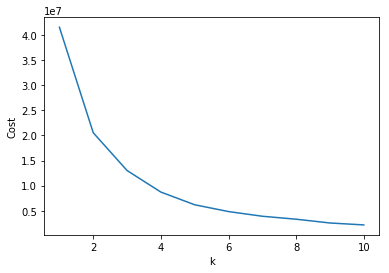

In [213]:
plt.plot(range(1, kMax+1),cost)
plt.xlabel('k')
plt.ylabel('Cost')
plt.show()

In [234]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(x_train)

# add clustering labels
df_pre_perform_clean.insert(0, 'Cluster Labels', kmeans.labels_)

In [235]:
df_pre_perform_clean

,Cluster Labels,Rank,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Rider,,,,,,,,,,,,,,
BARDET Romain,3,6.0,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0,1
DILLIER Silvan,0,83.0,72.0,653.0,1,3,6,371,38,0.0,0.0,0.0,5.0,0
FRANK Mathias,2,55.0,156.0,375.0,0,0,8,262,52,0.0,0.0,1.0,30.0,0
LATOUR Pierre,0,13.0,124.0,453.0,1,3,18,601,43,0.0,0.0,5.0,106.0,0
NAESEN Oliver,3,66.0,37.0,1019.0,0,2,7,433,41,0.0,0.0,2.0,15.0,0
CORT NIELSEN Magnus,0,68.0,112.0,480.0,2,6,17,424,47,0.0,0.0,2.0,13.0,0
FRAILE MATARRANZ Omar,2,57.0,257.0,263.0,2,4,4,225,37,0.0,0.0,0.0,5.0,0
FUGLSANG Jakob,0,12.0,67.0,703.0,1,7,16,786,39,0.0,2.0,3.0,224.0,0
HANSEN Jesper,2,56.0,233.0,279.0,0,0,1,145,38,0.0,0.0,0.0,12.0,0


In [236]:
df_pre_perform_clean.groupby('Cluster Labels').count()

,Rank,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Cluster Labels,,,,,,,,,,,,,
0,24,24,24,24,24,24,24,24,24,24,24,24,24
1,10,10,10,10,10,10,10,10,10,10,10,10,10
2,39,39,39,39,39,39,39,39,39,39,39,39,39
3,14,14,14,14,14,14,14,14,14,14,14,14,14
4,3,3,3,3,3,3,3,3,3,3,3,3,3


In [237]:
df_pre_perform_clean.loc[df_pre_perform_clean['Cluster Labels'] == 0, df_pre_perform_clean.columns[[1] + list(range(5, df_pre_perform_clean.shape[1]))]]

,Rank,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Rider,,,,,,,,,,
DILLIER Silvan,83.0,3,6,371,38,0.0,0.0,0.0,5.0,0
LATOUR Pierre,13.0,3,18,601,43,0.0,0.0,5.0,106.0,0
CORT NIELSEN Magnus,68.0,6,17,424,47,0.0,0.0,2.0,13.0,0
FUGLSANG Jakob,12.0,7,16,786,39,0.0,2.0,3.0,224.0,0
VALGREN ANDERSEN Michael,44.0,2,3,627,38,0.0,0.0,0.0,14.0,0
IZAGIRRE INSAUSTI Gorka,24.0,7,20,691,51,0.0,1.0,1.0,23.0,0
IZAGIRRE INSAUSTI Ion,22.0,5,12,576,51,0.0,0.0,1.0,38.0,0
CARUSO Damiano,20.0,5,13,414,42,0.0,1.0,5.0,133.0,0
KÜNG Stefan,53.0,7,11,269,40,2.0,2.0,2.0,105.0,0


In [226]:
df_pre_perform_clean.loc[df_pre_perform_clean['Cluster Labels'] == 1, df_pre_perform_clean.columns[[1] + list(range(5, df_pre_perform_clean.shape[1]))]]

,Rank,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Rider,,,,,,,,,,
KANGERT Tanel,16.0,1,1,123,44,0.0,0.0,0.0,60.0,0
HAUSSLER Heinrich,125.0,0,0,78,24,0.0,0.0,0.0,5.0,0
KOREN Kristjan,102.0,1,5,66,40,0.0,0.0,1.0,5.0,0
GUARNIERI Jacopo,144.0,0,0,20,25,0.0,0.0,0.0,5.0,0
THOMSON Jay Robert,143.0,0,1,35,39,0.0,0.0,0.0,5.0,0
CRADDOCK Lawson,145.0,1,4,104,44,0.0,0.0,0.0,5.0,0
PHINNEY Taylor,136.0,0,2,117,34,0.0,0.0,0.0,5.0,0
KOCHETKOV Pavel,61.0,0,1,65,42,0.0,0.0,0.0,5.0,0
BERNARD Julien,35.0,1,4,73,40,0.0,0.0,0.0,10.0,0


In [227]:
df_pre_perform_clean.loc[df_pre_perform_clean['Cluster Labels'] == 2, df_pre_perform_clean.columns[[1] + list(range(5, df_pre_perform_clean.shape[1]))]]

,Rank,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Rider,,,,,,,,,,
FRANK Mathias,55.0,0,8,262,52,0.0,0.0,1.0,30.0,0
FRAILE MATARRANZ Omar,57.0,4,4,225,37,0.0,0.0,0.0,5.0,0
HANSEN Jesper,56.0,0,1,145,38,0.0,0.0,0.0,12.0,0
PELLIZOTTI Franco,60.0,0,0,25,31,0.0,0.0,0.0,5.0,0
GERRANS Simon,107.0,1,5,109,40,0.0,0.0,0.0,5.0,0
SCHÄR Michael,90.0,1,1,81,38,0.0,0.0,0.0,5.0,0
BODNAR Maciej,122.0,2,10,118,46,0.0,0.0,2.0,17.0,0
BURGHARDT Marcus,92.0,0,6,125,30,0.0,0.0,1.0,7.0,0
MÜHLBERGER Gregor,76.0,1,9,167,33,0.0,0.0,2.0,20.0,0


In [238]:
df_pre_perform_clean.loc[df_pre_perform_clean['Cluster Labels'] == 3, df_pre_perform_clean.columns[[1] + list(range(5, df_pre_perform_clean.shape[1]))]]

,Rank,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Rider,,,,,,,,,,
BARDET Romain,6.0,6,17,772,32,0.0,2.0,6.0,203.0,1
NAESEN Oliver,66.0,2,7,433,41,0.0,0.0,2.0,15.0,0
COLBRELLI Sonny,109.0,8,20,572,44,1.0,1.0,3.0,56.0,0
DEMARE Arnaud,141.0,6,10,584,31,1.0,1.0,2.0,50.0,0
LANDA MEANA Mikel,7.0,4,13,500,33,0.0,0.0,2.0,34.0,1
QUINTANA ROJAS Nairo Alexander,10.0,7,14,606,31,1.0,2.0,4.0,209.0,1
ALAPHILIPPE Julian,33.0,10,20,932,45,1.0,2.0,3.0,92.0,0
BOASSON HAGEN Edvald,84.0,6,12,545,40,0.0,1.0,1.0,33.0,0
ZAKARIN Ilnur,9.0,0,4,190,34,0.0,0.0,3.0,73.0,1


In [239]:
df_pre_perform_clean.loc[df_pre_perform_clean['Cluster Labels'] == 4, df_pre_perform_clean.columns[[1] + list(range(5, df_pre_perform_clean.shape[1]))]]

,Rank,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine,tdf_top10
Rider,,,,,,,,,,
VAN AVERMAET Greg,28.0,10,21,785,47,1.0,1.0,2.0,19.0,0
SAGAN Peter,71.0,14,26,1246,43,1.0,2.0,5.0,90.0,0
KRISTOFF Alexander,114.0,5,23,685,54,0.0,1.0,2.0,23.0,0


In [286]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [270]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [251]:
x = preprocessing.StandardScaler().fit(x).transform(x)

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

('Train set:', (72L, 11L), (72L,))
('Test set:', (18L, 11L), (18L,))


In [307]:
clf = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred, labels=[1,0])

Confusion matrix, without normalization
[[ 0  0]
 [ 0 18]]


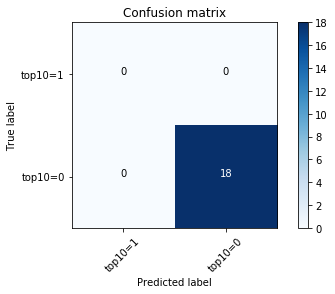

In [308]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['top10=1','top10=0'],normalize= False,  title='Confusion matrix')